## RFM Segmentation for Retail

The customer segmentation enables for marketing in reaching out to the customers in a personalized way. They can develop a vary focused communication and creatives based on customer profiles of each of these segments. This helps in improving response rates.

The customer segments are created based on Transactional Behaviour (called Transactional Segmentation), Geo Location of the customers (called Geo Segments), Demographic Attributes ( Demographic Segments) and customers' lifestyle/opinions/attitudes (called psychographic segmentation). In this blog, we will focus on the Transactional Behaviour Segmentation.

For understanding customers' transactional behaviour, transactional segmentation is important and RFM is one of the fundamental approach for segmenting customers basedon their transactional behaviour.

RFM stands for (R)ecency, (F)requency, and (M)onetary and it captures customer purchase behaviours related these dimensions.

RFM Methodology is very simple and effective way of developing the customer segmentation and we will explain the steps.

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

### 1. Data

In [36]:
#load the dataset
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


### 2. Data Preparation and EDA

In [37]:
#information of dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [38]:
#Country with high count must be taken for testing purpose... can we divide based on demographic or similar taste

df.Country.value_counts().head(5)

df = df[df.Country == 'United Kingdom']

<AxesSubplot:xlabel='Quantity'>

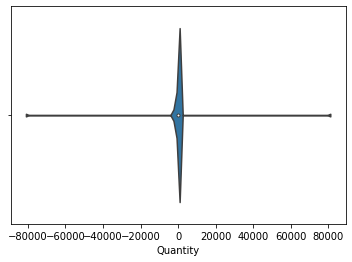

In [39]:
#checking distribution of quantity..

sns.violinplot(df.Quantity)


In [40]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [41]:
#Quantity can not be negative so remove negative values..
df = df[df['Quantity']>0]
df.Quantity.describe()


count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='UnitPrice'>

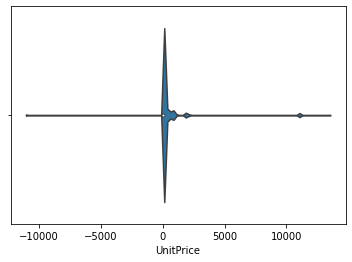

In [42]:
#checking distribution of unit price..
sns.violinplot(df.UnitPrice)

In [43]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

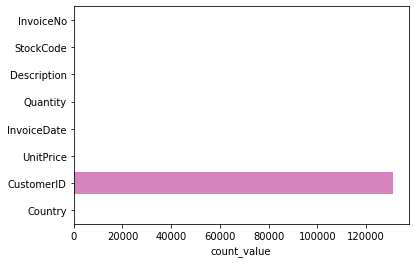

In [44]:
#checking null values in all columns in dataset
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(null_values.count_value,null_values.index)

In [45]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [46]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [47]:
#last date available in our dataset
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [48]:
#use latest date in our data as current date..

import datetime as dt
now = dt.date(2011,12,9)

In [49]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [51]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country        date  
0  12/1/2010 8:26       2.55      17850  United Kingdom  2010-12-01  
1  12/1/2010 8:26       3.39      17850  United Kingdom  2010-12-01  
2  12/1/2010 8:26       2.75      17850  United Kingdom  2010-12-01  
3  12/1/2010 8:26       3.39      17850  United Kingdom  2010-12-01  
4  12/1/2010 8:26       3.39      17850  United Kingdom  2010-12-01  


In [52]:
#group by customer by last date they purchased...

recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


In [53]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [54]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


In [55]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [56]:
#check frequency of customer means how many transaction has been done..

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()


,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,209
3,12749,5
4,12820,4


In [57]:
#calculate how much a customer spend in the each transaction...

df['Total_cost'] = df['UnitPrice'] * df['Quantity']

In [58]:
#check summed up spend of a customer with respect to latest date..

monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [59]:
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12747,4196.01
2,12748,33719.73
3,12749,4090.88
4,12820,942.34


In [60]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

In [61]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12747,2,11,4196.01
12748,0,209,33719.73
12749,3,5,4090.88
12820,3,4,942.34


In [65]:
#checking correctness of output..

df[df.CustomerID == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,2011-01-18,77183.6


In [66]:
(now - dt.date(2011,1,18)).days == 325

True

In [67]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

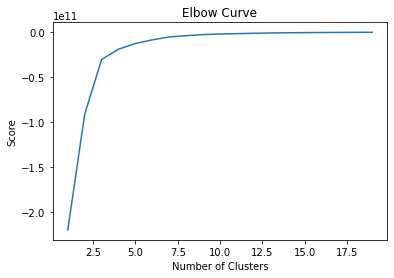

In [68]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [69]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [70]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [71]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747,2,11,4196.01,0
12749,3,5,4090.88,0
12820,3,4,942.34,0
12821,214,1,92.72,0
12822,70,2,948.88,0
12823,74,5,1759.50,0
12824,59,1,397.12,0
12826,2,7,1474.72,0
12827,5,3,430.15,0


<AxesSubplot:xlabel='cluster', ylabel='Recency'>

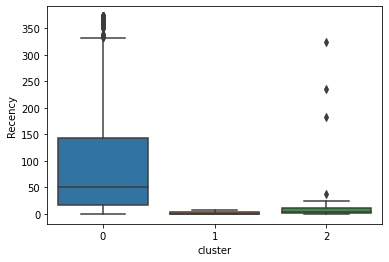

In [72]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

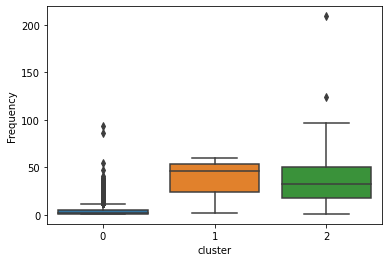

In [73]:
'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in 
race of platinum and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

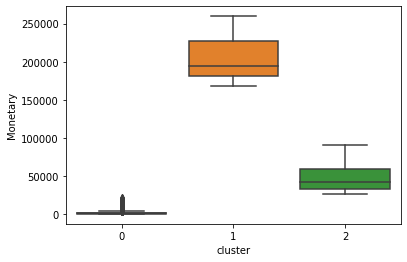

In [74]:
'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as 
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

Based on customer Segmentation we found out cluster 1 is Platinum customers Cluster 2 is Gold Customers Cluster 3 is Silver Customers

## Optional steps if want to perform for more granularity.

In [75]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [76]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,300.280
0.50,50.0,2.0,652.280
0.75,142.0,5.0,1576.585


In [77]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [78]:
quantile.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.28000000000003,
  0.5: 652.2800000000002,
  0.75: 1576.5850000000005}}

In [79]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()


,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346,325,1,77183.60,2,4,4,1,441
12747,2,11,4196.01,0,1,1,1,111
12748,0,209,33719.73,2,1,1,1,111
12749,3,5,4090.88,0,1,2,1,121
12820,3,4,942.34,0,1,2,2,122


In [80]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score 
between 3 and 12. Here the sdvantage is that each of the scores got same importance. However some scores 
will have many sgements as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [81]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346,325,1,77183.60,2,4,4,1,441,9
12747,2,11,4196.01,0,1,1,1,111,3
12748,0,209,33719.73,2,1,1,1,111,3
12749,3,5,4090.88,0,1,2,1,121,4
12820,3,4,942.34,0,1,2,2,122,5


In [82]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  187
Lost Cheap Customers:  396


In [83]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
18102,0,60,259657.30,1,1,1,1,111,3
17450,8,46,194550.79,1,1,1,1,111,3
17511,2,31,91062.38,2,1,1,1,111,3
16684,4,28,66653.56,2,1,1,1,111,3
14096,4,17,65164.79,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17102,261,1,25.50,0,4,4,4,444,12
15823,372,1,15.00,0,4,4,4,444,12
17763,263,1,15.00,0,4,4,4,444,12


In [84]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111     8443.319409
112     1241.785577
113      443.086667
114      201.120000
121     2482.559268
           ...     
434      208.722982
441    14665.555000
442      942.920313
443      402.421137
444      158.611742
Name: Monetary, Length: 61, dtype: float64

In [85]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

Total_score
3     8443.319409
4     3476.003567
5     2334.664483
6     1396.382037
7     1129.331281
8      695.442278
9      704.139754
10     363.057451
11     280.865560
12     158.611742
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Total_score'>

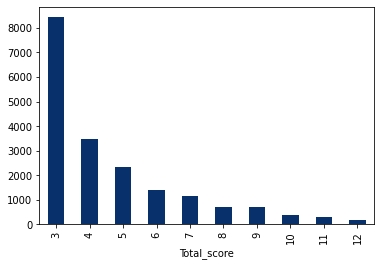

In [86]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total_score'>

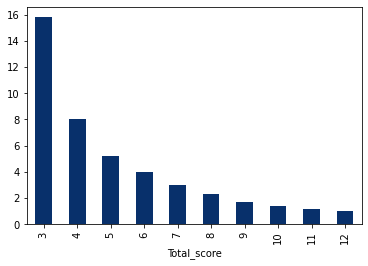

In [87]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')


<AxesSubplot:xlabel='Total_score'>

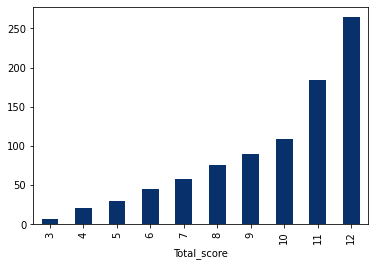

In [88]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')